# K Nearest Neighbors (KNN) Classifier for Detecting Breast Cancer

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('breast-cancer-wisconsin.data')

## Data Exploration

In [4]:
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marge_adhesion,single_epith_cell,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data Cleaning

#### There are many values in the dataset that are marked as '?'. We are going to replace them with a *Outlier*. 
We also could have dropped those rows altogether.

In [5]:
df.replace('?',-99999,inplace=True)
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marge_adhesion,single_epith_cell,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### Now, we need to drop the id column from the DataFrame, as it's existence would severly lower the accuracy of the K Nearest Neighbors algorithm.

In [6]:
df.drop(['id'], 1, inplace=True)
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marge_adhesion,single_epith_cell,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Building the Model

### Creating features and Labels

In [7]:
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

### Splitting the dataset
While experimenting with any learning algorithm, it is important not to test the prediction of an estimator on the data used to fit the estimator as this would not be evaluating the performance of the estimator on new data. This is why datasets are often split into train and test data.
#### A random permutation, to split the data randomly
```python
np.random.seed(42)
indices = np.random.permutation(len(X))
X_train = X[indices[:-20]]
y_train = y[indices[:-20]]
X_test = X[indices[-20:]]
y_test = y[indices[-20:]]
```
#### But we will use the `train_test_split` function from `sklearn.model_selection`

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=42)

#### Importing the Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier

#### Create and fit a Nearest Neighbor Classifier

In [18]:
clf= KNeighborsClassifier(metric='chebyshev')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Predictions

In [19]:
pred = clf.predict(X_test)
print(pred)

[2 2 2 4 2 2 2 4 4 2 2 4 2 2 2 4 2 4 4 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 2
 4 2 4 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 4 4 2 2 4 2 4 2
 2 2 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 4 4 2 4 2 2 4 4
 2 4 4 2 4 2 2 2 2 2 4 2 2 4 4 2 2 4 4 2 2 4 2 4 2 4 2 2 2]


## Evaluation

In [20]:
accuracy = clf.score(X_test, y_test)
accuracy

0.95714285714285718

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print(confusion_matrix(y_test,pred))

[[94  1]
 [ 1 44]]


In [25]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          2       0.99      0.99      0.99        95
          4       0.98      0.98      0.98        45

avg / total       0.99      0.99      0.99       140



In [22]:
ex = np.array([[4,2,1,1,1,2,3,2,1],[10,4,5,2,1,2,5,2,1],[4,2,1,1,1,2,3,2,1]])
ex = ex.reshape(len(ex),-1)
ex_pred = clf.predict(ex)
print(ex_pred)

[2 4 2]


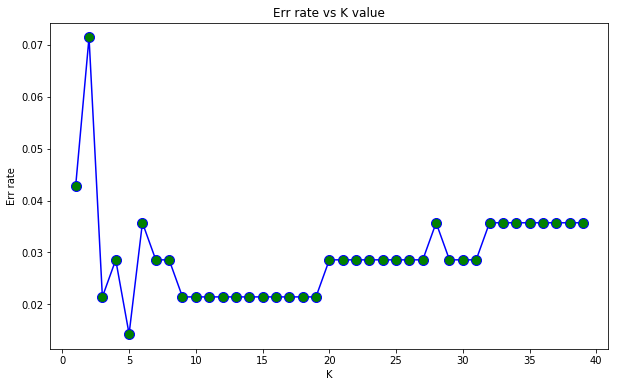

In [27]:
# elbow method
error_rate = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))# average error rate
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',marker='o',markerfacecolor='green',markersize=10)
plt.title('Err rate vs K value')
plt.xlabel('K')
plt.ylabel('Err rate')

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[94  1]
 [ 5 40]]
             precision    recall  f1-score   support

          2       0.95      0.99      0.97        95
          4       0.98      0.89      0.93        45

avg / total       0.96      0.96      0.96       140

